In [76]:
from pathlib import *
import time

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from fastai.vision import *

# import drawSvg as draw
import IPython
from io import BytesIO
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Utilities

In [ ]:
Path.ls = lambda x: list(x.iterdir())
def _describe(self):
    print(f"shape: {self.shape}")
    print(f"dtyle: {self.dtype}")
    print(f"min_val: {torch.min(self)}")
    print(f"max_val: {torch.max(self)}")
    print(f"type: {type(self)}")

torch.Tensor.describe = _describe

### Visualization utilties

In [113]:
def vis_stream(image, index):

    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')

    plt.axis('off')
    plt.title(f'iteration {index}')
    plt.grid('off')
    plt.tight_layout()

    # Show visualization in a streaming fashion.
    f = BytesIO()
    plt.savefig(f, format='jpeg')
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
    f.close()
    plt.close()

### Rule of the Game

In [93]:
'''
The rule in Conway's Game of Life can be expressed as 2 tensor operations

1) 2D convolution with the following kernel

     2  2  2
     2  1  2
     2  2  2 
    
2) Non-linear activation with this function:

    (z > 5) * (z < 7)
    
'''
kernel = 2*torch.ones((3,3)); kernel[1,1] = 1
kernel = kernel[None, None, ...]; 

kernel.describe()
print(kernel)

def evolve(x, k):
    z = F.conv2d(x, k, padding=1)
    a = torch.mul(torch.ge(z, 5), torch.le(z, 7))
    return a.float()

shape: torch.Size([1, 1, 3, 3])
dtyle: torch.float32
min_val: 1.0
max_val: 2.0
type: <class 'torch.Tensor'>
tensor([[[[2., 2., 2.],
          [2., 1., 2.],
          [2., 2., 2.]]]])


### Oscillators

#### Blinker (period 2)

torch.Size([1, 1, 5, 5])


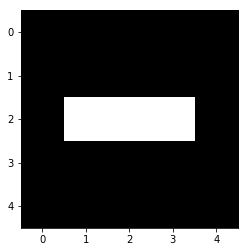

In [85]:
x_5_5 = torch.zeros(5, 5)
x_5_5[2,1] = 1
x_5_5[2,2] = 1
x_5_5[2,3] = 1

x_5_5 = x_5_5[None, None, ...] 
print(x_5_5.shape)
plt.imshow(np.squeeze(x_5_5.numpy()), cmap='gray')

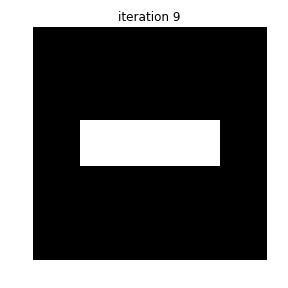

In [82]:
num_iteration = 10

a = x_5_5

try:
    for i in range(num_iteration):
        a = evolve(a, kernel)

        time.sleep(0.5)
        
        vis_stream(np.squeeze(a.numpy()), i)
        IPython.display.clear_output(wait=True)
except KeyboardInterrupt:
    plt.close()
    print("Stream stopped.")

#### Toad (period 2) 

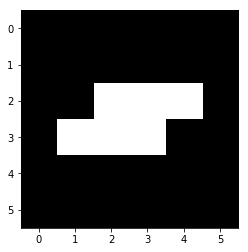

In [86]:
x_6_6 = torch.zeros(6, 6)

x_6_6[2,2] = 1
x_6_6[2,3] = 1
x_6_6[2,4] = 1

x_6_6[3,1] = 1
x_6_6[3,2] = 1
x_6_6[3,3] = 1

x_6_6 = x_6_6[None, None, ...] 

plt.imshow(np.squeeze(x_6_6.numpy()), cmap='gray')

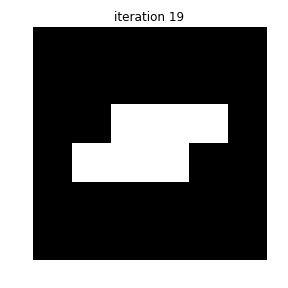

In [89]:
num_iteration = 20

a = x_6_6

try:
    for i in range(num_iteration):
        a = evolve(a, kernel)

        time.sleep(0.5)
        
        vis_stream(np.squeeze(a.numpy()), i)
        IPython.display.clear_output(wait=True)
except KeyboardInterrupt:
    plt.close()
    print("Stream stopped.")

#### Beacon (period 2)

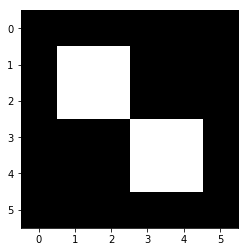

In [94]:
x_6_6 = torch.zeros(6, 6)

x_6_6[1,1] = 1
x_6_6[1,2] = 1
x_6_6[2,1] = 1
x_6_6[2,2] = 1

x_6_6[3,3] = 1
x_6_6[3,4] = 1
x_6_6[4,3] = 1
x_6_6[4,4] = 1

x_6_6 = x_6_6[None, None, ...] 

plt.imshow(np.squeeze(x_6_6.numpy()), cmap='gray')

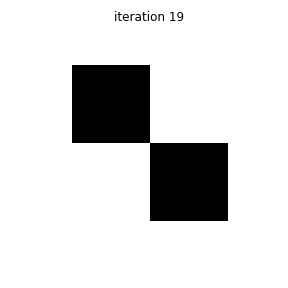

In [96]:
num_iteration = 10

a = x_6_6

try:
    for i in range(num_iteration):
        a = evolve(a, kernel)

        time.sleep(0.5)
        
        vis_stream(1-np.squeeze(a.numpy()), i)
        IPython.display.clear_output(wait=True)
except KeyboardInterrupt:
    plt.close()
    print("Stream stopped.")

#### Random

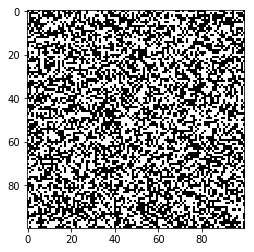

In [108]:
x_random = torch.randint(0, 2, (100, 100)).float()
x_random = x_random[None, None, ...] 

plt.imshow(np.squeeze(x_random.numpy()), cmap='gray')

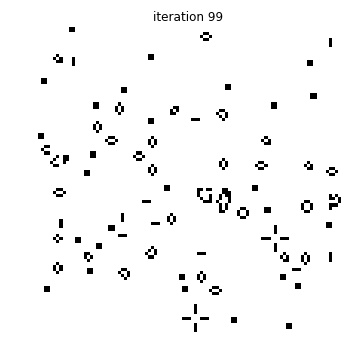

In [117]:
num_iteration = 100

#a = x_random

try:
    for i in range(num_iteration):
        a = evolve(a, kernel)

#         time.sleep(0.5)
        
        vis_stream(1-np.squeeze(a.numpy()), i)
        IPython.display.clear_output(wait=True)
except KeyboardInterrupt:
    plt.close()
    print("Stream stopped.")

In [106]:
torch.randint?

### Scratch Pad

In [ ]:
# Population space X

X = torch.zeros((2**8,3,3)); X[:,1,1] = 1; X

for i in range(2**8):
    X[i,0,0] = i & 1
    X[i,0,1] = i >> 1 & 1
    X[i,0,2] = i >> 2 & 1
    X[i,1,0] = i >> 3 & 1
    X[i,1,2] = i >> 4 & 1
    X[i,2,0] = i >> 5 & 1
    X[i,2,1] = i >> 6 & 1
    X[i,2,2] = i >> 7 & 1
        
# reshape this into something F.conv2d likes
X = X[:,None,:,:]
X.shape

In [ ]:
# kernel = torch.ones(3, 3); kernel[1, 1] = 0.5
# kernel = kernel[None,None,...]; 

# kernel.describe(); print(kernel)

In [ ]:
# x_test = X[3:4]    # grad 3rd and preserve shape
# x_test = F.pad(x_test, pad=(1, 1, 1, 1), value=0)   #zero padding
# x_test
# F.conv2d(x_test, kernel)

In [ ]:
F.conv2d(X[3:4], kernel, padding=1)
F.threshold(-1*torch.ones(1), 1, 1)
F.hardtanh(5*torch.ones(1), min_val=4, max_val=4)

In [ ]:
z = torch.linspace(0, 17, steps=18); z
torch.mul(torch.ge(z, 5), torch.le(z, 7))

In [ ]:
# X o k2 
x = X[3:4]
print(x)
z = F.conv2d(x, kernel, padding=1)
#print(z)
a = torch.mul(torch.ge(z, 5), torch.le(z, 7))
print(a)